In [2]:
from google.colab import files
uploaded = files.upload()

Saving movies_metadata.csv to movies_metadata.csv


In [877]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['movies_metadata.csv']))
# Dataset is now stored in a Pandas Dataframe

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [878]:
df.shape

(45466, 24)

In [879]:
(df.revenue == 0).sum()

38052

38k registros con revenue = 0

In [880]:
df = df[df.revenue > 0]

In [881]:
df.shape

(7408, 24)

Quedan 7408 registros si nos quedamos con los revenue > *0*

In [882]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [883]:
(df.video == True).sum()

0

In [884]:
(df.status != 'Released').sum()

13

In [885]:
(df.adult != 'False').sum()

0

Siendo que hay tan poca variabilidad en los valores de estas columnas las quito tambien.

In [886]:
df = df[['belongs_to_collection', 'budget', 'genres',
       'imdb_id', 'original_language', 'overview',
       'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime', 'title','vote_average', 'vote_count']]

In [887]:
df.head()

,belongs_to_collection,budget,genres,imdb_id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",tt0113497,en,When siblings Judy and Peter discover an encha...,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0114885,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",tt0113041,en,Just when George Banks has recovered from his ...,8.38752,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0
5,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",tt0113277,en,"Obsessive master thief, Neil McCauley leads a ...",17.9249,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,Heat,7.7,1886.0


In [888]:
df.belongs_to_collection[0]

"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"

Hago a los nulls o na de la columna belongs_to_collection = 0


In [889]:
df['belongs_to_collection'].fillna(0, inplace = True)

In [890]:
df['belongs_to_collection'].isnull().sum()

0

Limpio el diccionario para quedarme solo con el nombre de la colección

In [891]:
import ast
def collection_from_dict(x):
  if x != 0:
   #convert string to dictionary
    res = ast.literal_eval(x) 
    #return just the name of the collection
    return res['name']
  return 0
df['collection'] = df.belongs_to_collection.apply(lambda x: collection_from_dict(x))


In [892]:
df.collection.head()

0              Toy Story Collection
1                                 0
3                                 0
4    Father of the Bride Collection
5                                 0
Name: collection, dtype: object

Elimino la columna antigua

In [893]:
df.drop(columns = 'belongs_to_collection', inplace = True)

Hago lo mismo con genres, production_companies y production_countries

In [894]:
df['genres'].fillna(0, inplace = True)
df.genres.replace('[]', 0, inplace = True)
df['production_companies'].fillna(0, inplace = True)
df.production_companies.replace('[]', 0, inplace = True)
df['production_countries'].fillna(0, inplace = True)
df.production_countries.replace('[]', 0, inplace = True)

In [895]:
#aplico la funcion para crear las nuevas columnas (me quedo solo con el valor del primer dict)
def first_name_from_dict(x):
  if x != 0:
    #convert string to dictionary
    res = ast.literal_eval(x) 
    #return just the name of the first dict
    return res[0]['name']
  return 0


df['genre'] = df.genres.apply(lambda x: first_name_from_dict(x))
df['production'] = df.production_companies.apply(lambda x: first_name_from_dict(x))
df['country'] = df.production_countries.apply(lambda x: first_name_from_dict(x))

#elimino las columnas antiguas
df.drop(columns = ['genres', 'production_companies', 'production_countries'], inplace = True)
df.head()

,budget,imdb_id,original_language,overview,popularity,release_date,revenue,runtime,title,vote_average,vote_count,collection,genre,production,country
0,30000000,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,Toy Story Collection,Animation,Pixar Animation Studios,United States of America
1,65000000,tt0113497,en,When siblings Judy and Peter discover an encha...,17.0155,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,0,Adventure,TriStar Pictures,United States of America
3,16000000,tt0114885,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,0,Comedy,Twentieth Century Fox Film Corporation,United States of America
4,0,tt0113041,en,Just when George Banks has recovered from his ...,8.38752,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,Father of the Bride Collection,Comedy,Sandollar Productions,United States of America
5,60000000,tt0113277,en,"Obsessive master thief, Neil McCauley leads a ...",17.9249,1995-12-15,187436818.0,170.0,Heat,7.7,1886.0,0,Action,Regency Enterprises,United States of America


In [896]:
df.overview.isnull().values.sum()

22

In [897]:
df.release_date.isnull().values.sum()

1

In [898]:
df.runtime.isnull().values.sum()

6

Elimino las filas de release_date, runtime y overview que tienen null dado que son poquitos registros.

In [899]:
df.fillna(0, inplace= True)

In [900]:
df = df[df.overview != 0]
df = df[df.runtime != 0]
df = df[df.release_date != 0]

In [901]:
df.isnull().values.sum()

0

In [902]:
#dado que la mayoria no pertenece a una coleccion, voy a hacer que sea una variable binaria. 0 si no pertences, 1 si perteneces
(df.collection == 0).sum()

5895

In [903]:
def collection(x):
  if x != 0:
    return 1
  return 0
df.collection = df.collection.apply(lambda x: collection(x))

pd.crosstab(index = df.collection, columns = 'count')

col_0,count
collection,
0,5895
1,1480


##Runtime

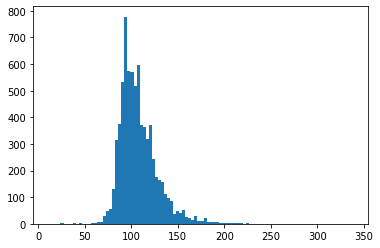

In [904]:
x = df.runtime
plt.hist(x, bins = 100)
plt.show()

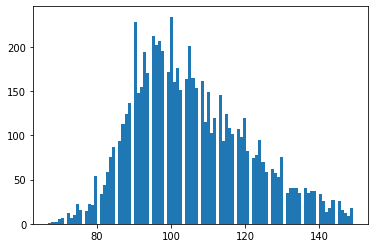

In [905]:
upper_lim = np.mean(df.runtime) + np.std(df.runtime)*2
lower_lim = np.mean(df.runtime) - np.std(df.runtime)*2

df = df[df.runtime > lower_lim]
df = df[df.runtime < upper_lim]

x = df.runtime
plt.hist(x, bins = 100)
plt.show()

In [906]:
df.shape

(7035, 15)

##Budget

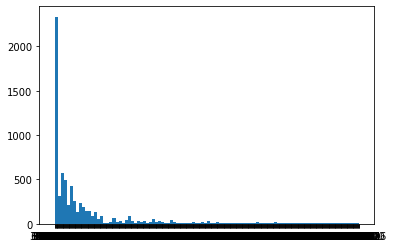

In [907]:
x = df.budget
plt.hist(x, bins = 100)
plt.show()

## Release date

In [908]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [909]:
#Trabajo solo con el año de la pelicula
df['year'] = pd.DatetimeIndex(df['release_date']).year

In [910]:
df.drop(columns = ['release_date'], inplace = True)

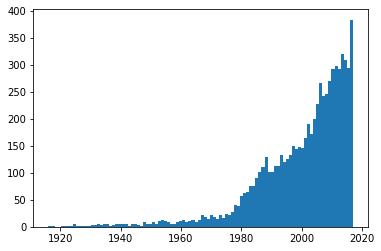

In [911]:
x = df.year
plt.hist(x, bins = 100)
plt.show()

In [912]:
#Me quedo con las peliculas del 1985 en adelante
df = df[df.year > 1985]

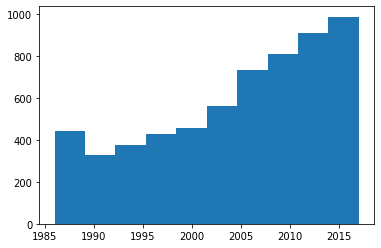

In [913]:
x = df.year
plt.hist(x, bins = 10)
plt.show()

##Revenue

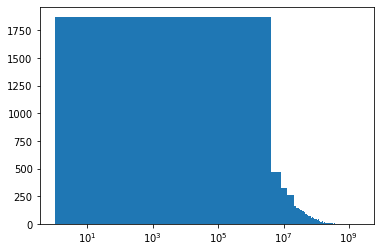

In [914]:
import matplotlib.pyplot as plt

x = df.revenue
plt.hist(x, bins = 500)
plt.xscale('log')
plt.show()

In [915]:
cat = pd.qcut(df['revenue'], q=4)

In [916]:
pd.crosstab(index = cat, columns = 'count')

col_0,count
revenue,
"(0.999, 2076423.5]",1511
"(2076423.5, 17768012.0]",1511
"(17768012.0, 74577879.0]",1510
"(74577879.0, 2068223624.0]",1511


Quito outliers usando la median absolute deviation porque no tiene una distribución de cola pesada.
Hago la mediana +- 2.5 MAD

In [917]:
from scipy import stats
from statistics import median
mad =stats.median_absolute_deviation(df.revenue)
med = median(df.revenue)

upp_lim = med + 2.5*mad
low_lim = med - 2.5*mad

df = df[df.revenue < upp_lim]
df = df[df.revenue > low_lim]
df.shape

(4629, 15)

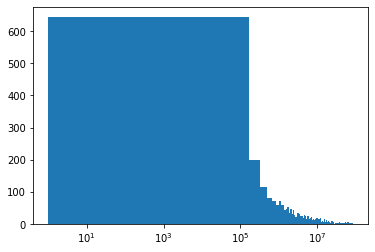

In [918]:
x = df.revenue
plt.hist(x, bins = 500)
plt.xscale('log')
plt.show()

Creo dos columnas. Una divido al revenue en 4 cuartiles y la otra es dividir al revenue en 10 deciles

In [919]:
labels_4 = ['Bajo', 'Moderado', 'Alto', 'Muy Alto']
labels_10 = ['Bajisimo','Muy Bajo','Bajo','Moderado Bajo','Moderado Medio','Moderado Alto','Alto Bajo','Alto Medio','Muy Alto','Altisimo']

df['quantile_4'] = pd.qcut(df['revenue'], q=4, precision = 0, labels = labels_4)
df['quantile_10'] = pd.qcut(df['revenue'], q=10, precision=0, labels = labels_10)


In [920]:
#CREO TABLAS PARA SABER QUE THRESHOLD CORRESPONDE A CADA TIER
results4, bin_edges4 = pd.qcut(df['revenue'],
                            q=4,
                            labels=labels_4,
                            retbins=True)

results_table_4 = pd.DataFrame(zip(bin_edges4, labels_4),
                            columns=['Threshold', 'Tier'])


results10, bin_edges10 = pd.qcut(df['revenue'],
                            q=10,
                            labels=labels_10,
                            retbins=True)

results_table_10 = pd.DataFrame(zip(bin_edges10, labels_10),
                            columns=['Threshold', 'Tier'])


In [921]:
results_table_4

,Threshold,Tier
0,1.0,Bajo
1,944915.0,Moderado
2,8025872.0,Alto
3,27728118.0,Muy Alto


In [922]:
results_table_10

,Threshold,Tier
0,1.0,Bajisimo
1,66172.8,Muy Bajo
2,444043.6,Bajo
3,1644338.0,Moderado Bajo
4,4000000.0,Moderado Medio
5,8025872.0,Moderado Alto
6,14059961.0,Alto Bajo
7,21794876.4,Alto Medio
8,34827037.8,Muy Alto
9,52602436.0,Altisimo


In [923]:
df.describe(include='category')

,quantile_4,quantile_10
count,4629,4629
unique,4,10
top,Bajo,Moderado Bajo
freq,1158,465


Creo otras dos columnas que armen 4 y 10 rangos del mismo tamaño en terminos de revenue en cada uno

In [924]:
df['4cuts'] = pd.cut(df['revenue'], bins = 4, labels = labels_4)
df['10cuts'] = pd.cut(df['revenue'], bins = 10, labels = labels_10)

In [925]:
pd.crosstab(index = df['4cuts'], columns = 'count')

col_0,count
4cuts,
Bajo,3197
Moderado,702
Alto,436
Muy Alto,294


In [926]:
pd.crosstab(index = df['10cuts'], columns = 'count')

col_0,count
10cuts,
Bajisimo,2346
Muy Bajo,587
Bajo,428
Moderado Bajo,288
Moderado Medio,250
Moderado Alto,195
Alto Bajo,170
Alto Medio,142
Muy Alto,124


## Feature Engineering: categorical data to numeric values

In [927]:
df['genre'] = df['genre'].astype('str')
df['country'] = df['country'].astype('str') 
df['production'] = df['production'].astype('str')
df['original_language'] = df['original_language'].astype('str')  

In [928]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
genre_labels = gle.fit_transform(df['genre'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
genre_mappings

{0: '0',
 1: 'Action',
 2: 'Adventure',
 3: 'Animation',
 4: 'Comedy',
 5: 'Crime',
 6: 'Documentary',
 7: 'Drama',
 8: 'Family',
 9: 'Fantasy',
 10: 'Foreign',
 11: 'History',
 12: 'Horror',
 13: 'Music',
 14: 'Mystery',
 15: 'Romance',
 16: 'Science Fiction',
 17: 'TV Movie',
 18: 'Thriller',
 19: 'War',
 20: 'Western'}

In [929]:
df['GenreLabel'] = genre_labels

In [930]:
country_labels = gle.fit_transform(df['country'])
country_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
country_mappings
df['CountryLabel'] = country_labels

In [931]:
production_labels = gle.fit_transform(df['production'])
production_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
country_mappings
df['ProductionLabel'] = production_labels

In [932]:
language_labels = gle.fit_transform(df['original_language'])
language_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
country_mappings
df['LanguageLabel'] = language_labels

## Armar modelo predictivo

In [933]:
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score, f1_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

####Train and test set

In [934]:
train_df = df[df.year <= 2014]
test_df = df[df.year > 2014]

len(train_df), len(test_df), len(test_df) / len(train_df)

(4139, 490, 0.11838608359507127)

In [935]:
X_train = train_df[['runtime','budget','collection', 'LanguageLabel', 'GenreLabel', 'CountryLabel', 'ProductionLabel']]
y_train = np.ravel(train_df[['quantile_4']])

X_test = test_df[['runtime','budget','collection', 'LanguageLabel', 'GenreLabel', 'CountryLabel', 'ProductionLabel']]
y_test = test_df[['quantile_4']]

####Normalize data

In [936]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

####Modelos

In [937]:
clf = LogisticRegression(random_state = 21)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy: ', accuracy_score(y_test, y_pred), 'f1_score: ', f1_score(y_test, y_pred, average = 'weighted'))

accuracy:  0.4489795918367347 f1_score:  0.4346650130074534


In [938]:
clf = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 50, random_state = 21)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy: ', accuracy_score(y_test, y_pred), 'f1_score: ', f1_score(y_test, y_pred, average = 'weighted'))

accuracy:  0.43673469387755104 f1_score:  0.4354385742917243


In [939]:
clf = RandomForestClassifier(max_depth = 10, min_samples_leaf = 50, random_state = 21)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy: ', accuracy_score(y_test, y_pred), 'f1_score: ', f1_score(y_test, y_pred, average = 'weighted'))

accuracy:  0.4775510204081633 f1_score:  0.4601783266644225


In [940]:
print(confusion_matrix(y_test, y_pred, labels = labels_4))

[[101  27  12   5]
 [ 57  33  36  15]
 [ 15  21  32  31]
 [ 10  10  17  68]]


# para implementar

con eso aprovechar todos los generos, no solo el primero. Tambien usar para productora y país.

In [ ]:
#df['genres'] = df.genres.apply(lambda x: [i['name']  for i in eval(x)])